### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

### Company wants to know

 * Which variables are significant in predicting the price of a car
 * How well those variables describe the price of a car
 
### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
car_details = pd.read_csv('CarPrice_Assignment.csv')

In [13]:
car_details.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
car_details.shape

(205, 26)

In [15]:
car_details.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [17]:
# Data Cleaning
# Split the company name for CarName Variable

companyname = car_details["CarName"].apply(lambda name: name.split(' ')[0])

In [19]:
#Droping the carName variable as it not need
car_details.drop(columns={'CarName'},axis=1,inplace=True)

In [20]:
car_details.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
car_details.insert(loc=3,column='companyname',value=companyname)

In [22]:
car_details.head()

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
car_details['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

From the above result, we have spelling mistakes in the companyname variable. The following list shows the words which has spelling mistakes. Words in bold is the correct spelling.

1. volkswagen = vokswagen, vw
2. mazda = maxda
3. porsche = porcshce
4. toyota = toyouta

In [24]:
# Convert the data into lowercase
car_details['companyname'] = car_details['companyname'].str.lower()

In [25]:
car_details['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [26]:
# Define a function to rename the spelling mistakes
def renameCompanyName(error_data, correct_data):
    car_details['companyname'].replace(error_data, correct_data, inplace = True)

In [27]:
# Call renameCompanyName function
renameCompanyName('vw','volkswagen')
renameCompanyName('vokswagen','volkswagen')
renameCompanyName('maxda','mazda')
renameCompanyName('porcshce','porsche')
renameCompanyName('toyouta','toyota')

In [29]:
# Check the unique values in companyname variable
car_details['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [30]:
# Checking for duplicate values in car_details dataframe
car_details.loc[car_details.duplicated()]

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


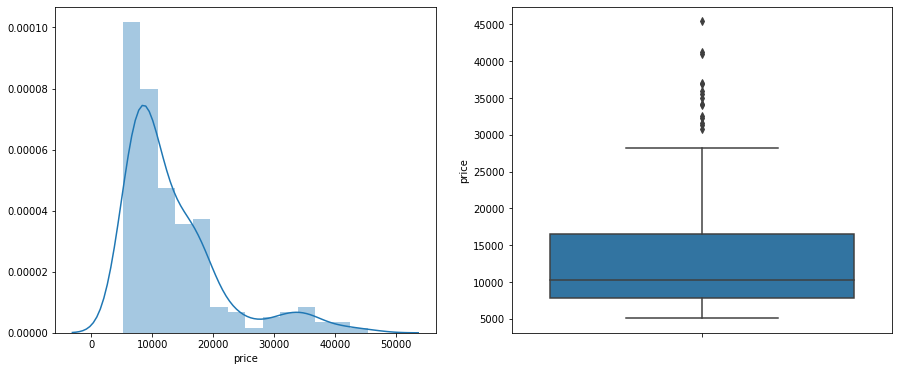

In [32]:
# Let's understand the price of the car
plt.figure(figsize=(15,6)) #Set width and height for plots
plt.subplot(1,2,1) # set the rows,columns and their indexing postions
sns.distplot(a = car_details.price)


plt.subplot(1,2,2) # Set the rows, columns and their indexing position
sns.boxplot(y = car_details.price)

From the distribution plot, we can see that there is right skewed and most of the car prices are below 20000.

In the box plot, there are outliers which shows some of the car prices are significantly higher.

In [33]:
# Let's see the mean, median and other percentile for the car prices
car_details.price.describe(percentiles = [0.25, 0.5, 0.75, 0.85, 0.95, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

* There is a significance difference between mean and median of the car prices.
* There is a high variance in the car prices whereas 85 % of the car prices falls within 18500 and the remaining 15% ranges between 18500 and 45400.

[Text(0, 0.5, 'Frequency of fuel type'), Text(0.5, 0, 'Fuel Type')]

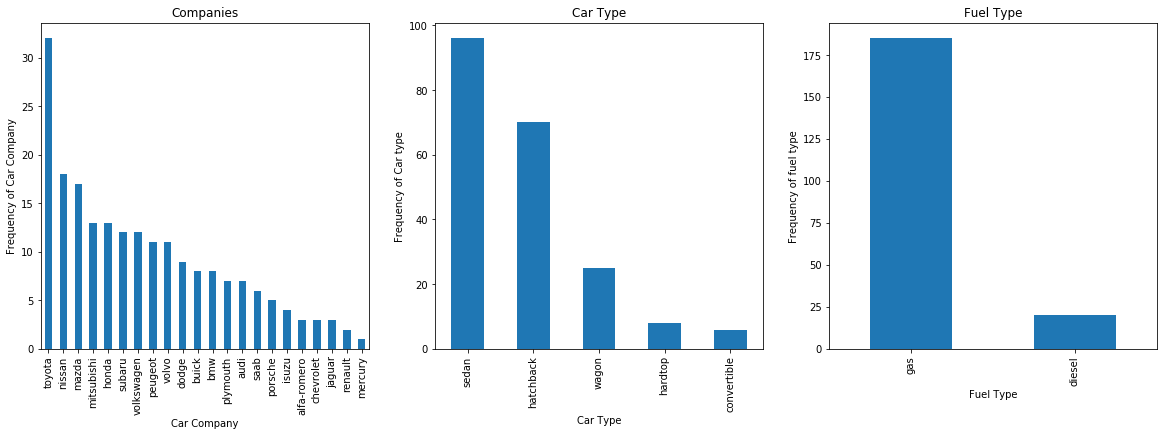

In [34]:
## Virtualize the categorical variables
# Let's virtualize the car companies, car types and fuel types
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt1 = car_details.companyname.value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car Company', ylabel='Frequency of Car Company')

plt.subplot(1,3,2)
plt1 = car_details.carbody.value_counts().plot('bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.subplot(1,3,3)
plt1 = car_details.fueltype.value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

* **toyota** is the most favored car company.

* **sedan** is the car type being used by most of the car companies.

* **gas** is used mostly than diesel

[Text(0, 0.5, 'Frequency of Engine Type'), Text(0.5, 0, 'Engine Type')]

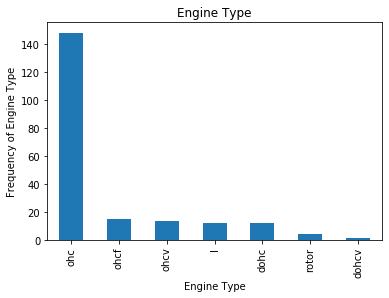

In [38]:
# Let's virutalize the engine types
plt1 = car_details.enginetype.value_counts().plot('bar')
plt.title('Engine Type')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine Type')

**dhc** is the most favored engine type for the car companies

Let's compare the average prices for car companies and engine type.

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Fuel Type')]

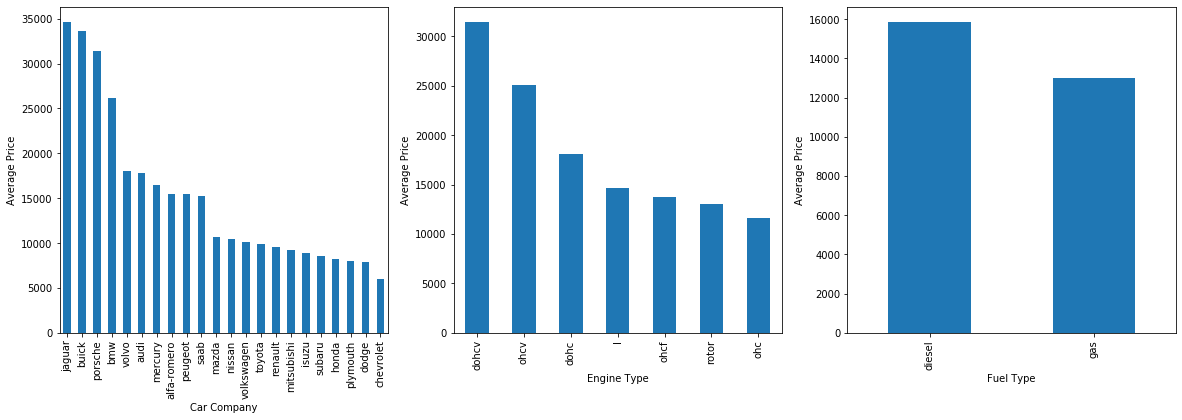

In [39]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt1 = car_details.groupby('companyname')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Car Company', ylabel = 'Average Price')

plt.subplot(1,3,2)
plt1 = car_details.groupby('enginetype')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Type', ylabel = 'Average Price')

plt.subplot(1,3,3)
plt1 = car_details.groupby('fueltype')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Fuel Type', ylabel = 'Average Price')

**jaguar, buick, porsche, bmw, volvo** are the top 5 car companies having higher average price.

**dohcv** is the most favored engine type.

**diesel** has the highest average prices than gas. Most of the car companies preferred gas as their fuel type.

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Engine Location')]

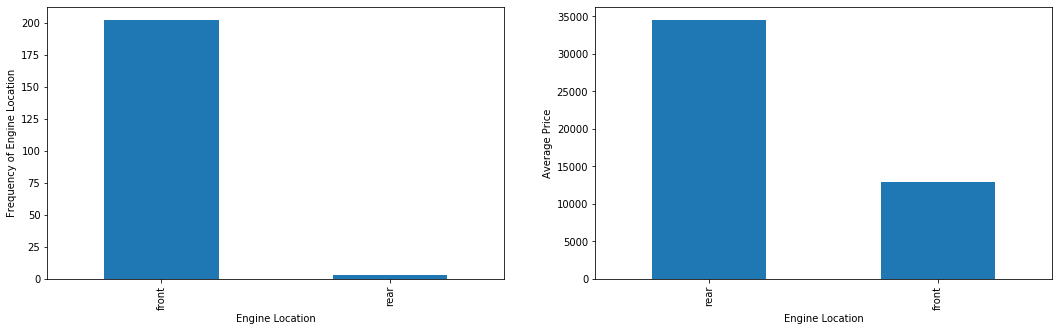

In [40]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt1 = car_details.enginelocation.value_counts().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Location', ylabel = 'Frequency of Engine Location')

plt.subplot(1,2,2)
plt1 = car_details.groupby('enginelocation')['price'].mean().sort_values(ascending = False).plot('bar')
plt1.set(xlabel = 'Engine Location', ylabel = 'Average Price')

In [42]:
car_details.head()

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**front** is the most favored engine location used by most of the car companies. **rear** has the highest average price then front.

##  Extracting new features

In [43]:
# Calculating the fuel economy by using highwaympg and citympg
car_details['fueleconomy'] = (0.45 * car_details['highwaympg']) + (0.55 * car_details['citympg'])

In [44]:
# Calculating the stroke ratio by using boreratio and stroke
car_details['strokeratio'] = car_details['boreratio'] / car_details['stroke']

In [45]:
# Categorizing the car companies based on average car price
car_details['price'] = car_details['price'].astype('int')
temp1 = car_details.copy()

In [46]:
temp2 = temp1.groupby('companyname')['price'].mean()

In [50]:
temp2

companyname
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [51]:
temp1 = temp1.merge(temp2.reset_index(), how = 'left', on = 'companyname')


In [56]:
temp1.head()

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,fueleconomy,strokeratio,price_y
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,23.70,1.294776,15498.333333
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,23.70,1.294776,15498.333333
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,22.15,0.772334,15498.333333
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,26.70,0.938235,17859.142857
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,19.80,0.938235,17859.142857


In [57]:
bins = [0, 10000, 20000, 40000]
cars_bins = ['Low', 'Medium', 'High']
car_details['carsrange'] = pd.cut(temp1['price_y'], bins, right = False, labels = cars_bins)

In [59]:
car_details.head() 

,car_ID,symboling,fueltype,companyname,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,strokeratio,carsrange
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,23.70,1.294776,Medium
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,23.70,1.294776,Medium
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,22.15,0.772334,Medium
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,26.70,0.938235,Medium
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,19.80,0.938235,Medium


Text(0, 0.5, 'Price')

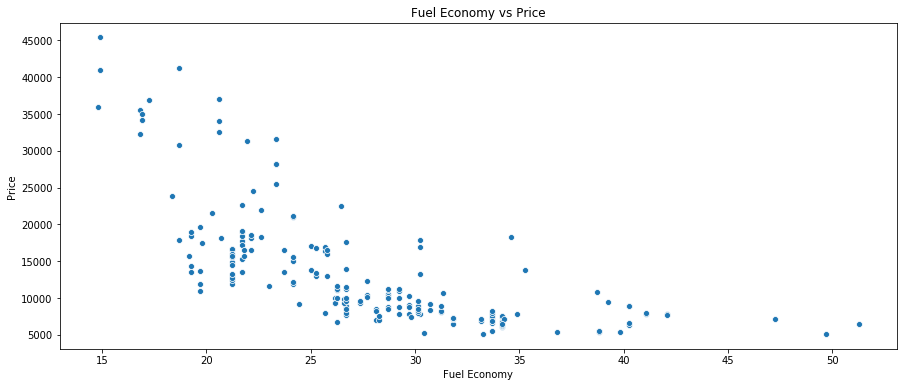

In [60]:
plt.figure(figsize = (15,6))
plt.title('Fuel Economy vs Price')
sns.scatterplot(x = car_details['fueleconomy'], y = car_details['price'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

There is a negative correlation between fuel economy and price and it is significant

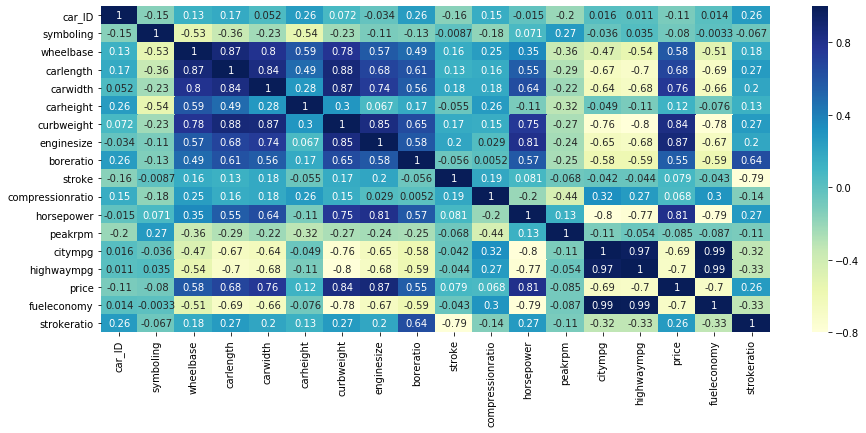

In [61]:
plt.figure(figsize=(15,6))
sns.heatmap(car_details.corr(), annot = True, cmap='YlGnBu')


price has high correlation for the list of features

* carlength = 0.68
* carwidth = 0.76
* curbweight = 0.84
* enginesize = 0.87
* horsepower = 0.81

##  Dummy Variables

In [62]:
categorical_variables = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                       'enginetype', 'cylindernumber', 'fuelsystem', 'carsrange']

In [63]:
def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first=True)
    df = pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

In [64]:
for variable in categorical_variables:
    car_details = dummies(variable,car_details)

In [65]:
car_details.head()

,car_ID,companyname,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
0,1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,1,0
1,2,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,1,0
2,3,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,1,0,0,1,0
3,4,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
4,5,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0


In [66]:
car_details.shape

(205, 54)

In [67]:
#Removing car_ID and companyname as it is not required for model building
car_details.drop(columns =['car_ID','companyname'], inplace = True)

In [68]:
car_details.shape

(205, 52)

## Test Train Data Split and Feature Scaling

In [71]:
# Importing train_test_split to train the data for model building
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_details, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
# Use MinMaxScaler to apply scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueleconomy', 'strokeratio', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [74]:
df_train.describe()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.412587,0.118881
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


In [75]:
df_train.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,High
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,1,0,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,1,0,0,1,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,1,0,0,1,0


In [80]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Model Building

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', False, 4),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 24),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 7),
 ('stroke', False, 8),
 ('compressionratio', False, 37),
 ('horsepower', True, 1),
 ('peakrpm', False, 12),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('fueleconomy', False, 5),
 ('strokeratio', False, 16),
 (-1, False, 21),
 (0, False, 20),
 (1, False, 19),
 (2, False, 18),
 (3, False, 22),
 ('gas', False, 13),
 ('turbo', False, 26),
 ('two', False, 40),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', False, 2),
 ('wagon', True, 1),
 ('fwd', False, 28),
 ('rwd', False, 38),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 29),
 ('ohc', False, 11),
 ('ohcf', False, 14),
 ('ohcv', False, 17),
 ('rotor', False, 6),
 ('five', False, 36),
 ('four', False, 15),
 ('six', False, 32),
 ('three', True, 1),
 ('twelve', False, 3),
 ('two', False, 10),
 ('2bbl', False, 33),
 ('4bbl', False,